In [1]:
from pymongo import MongoClient
import pprint 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import scipy as sp
from scipy.stats import ttest_ind

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup
import copy 

In [87]:
web = 'https://fbref.com'
url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

lst = list(range(1996,2021))
lst = lst[::-1]
for year in lst:
    button = soup.select_one('#meta > div:nth-child(2) > div > a.button2.prev').get('href')
    webbutton = web + button
    r = requests.get(webbutton)
    soup = BeautifulSoup(r.text, 'html.parser')
    tables = soup.find_all('table') #Grabing all the tables on the website
    indices = tables[0].find_all('th') #Grabing the the table we want
    rows = tables[0].find_all('tr')
    columns = {}
    for index in indices: #checking out the data
        columns[index.text] = None
    all_data = []
    keys = list(columns.keys())
    for i,row in enumerate(rows): #Getting my data ready to put into pandas
        if i > 0:
            new_row = copy.copy(columns)
            entries = row.find_all('td')
            for j,entry in enumerate(entries):
                new_row[keys[j+1]]= entry.text
            all_data.append(new_row)
    for dic in range(20): #Adjusting my data
        all_data[dic]['Rk'] = (dic+1)
    df = pd.DataFrame(all_data) #Making a pandas df 
    dlst = list(range(len(columns)-24,len(columns))) #deleting last columns that are not needed
    df.drop(df.columns[dlst], axis = 1, inplace = True)
    df.to_csv(f'data/{year}.csv', sep='!', index=False)

In [88]:
all_df = []
for year in reversed(lst):
    df = pd.read_csv(f'data/{year}.csv', sep='!')
    df['GA/GAME'] = df['GA']/df['MP']
    df['GF/GAME'] = df['GF']/df['MP']
    all_df.append(df)

In [12]:
lst_avg_gf = []
for year in range(25):
    avg_gf = all_df[year]['GF'].mean()
    lst_avg_gf.append(avg_gf)
lst_avg_gf
len(lst_avg_gf)

25

In [13]:
yr = lst[::-1]
yr
len(yr)

25

In [14]:
all_df[24].at[0,'Pts']

99

In [15]:
all_df[24]

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,xG,xGA,xGDiff,xGDiff/90
0,1,Liverpool,38,32,3,3,85,33,52,99,71.5,40.0,31.5,0.83
1,2,Manchester City,38,26,3,9,102,35,67,81,93.0,34.7,58.3,1.53
2,3,Manchester Utd,38,18,12,8,66,36,30,66,59.4,37.4,22.0,0.58
3,4,Chelsea,38,20,6,12,69,54,15,66,66.6,37.9,28.6,0.75
4,5,Leicester City,38,18,8,12,67,41,26,62,61.6,44.5,17.1,0.45
5,6,Tottenham,38,16,11,11,61,47,14,59,46.1,52.0,-6.0,-0.16
6,7,Wolves,38,15,14,9,51,40,11,59,47.1,34.8,12.3,0.32
7,8,Arsenal,38,14,14,10,56,48,8,56,49.2,56.6,-7.3,-0.19
8,9,Sheffield Utd,38,14,12,12,39,39,0,54,41.5,47.9,-6.4,-0.17
9,10,Burnley,38,15,9,14,43,50,-7,54,43.9,48.3,-4.4,-0.12


In [16]:
win_pts = []
for year in range(25):
    pts = all_df[year].at[0,'Pts']
    win_pts.append(pts)
win_pts

[82,
 75,
 78,
 79,
 91,
 80,
 87,
 83,
 90,
 95,
 91,
 89,
 87,
 90,
 86,
 80,
 89,
 89,
 86,
 87,
 81,
 93,
 100,
 98,
 99]

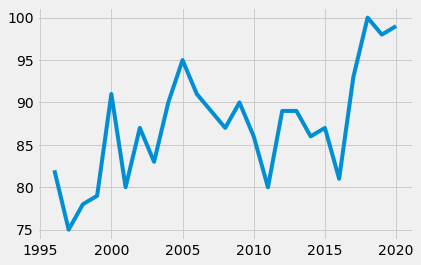

In [17]:
plt.plot(yr, win_pts)

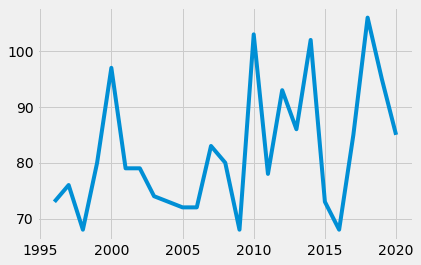

In [18]:
win_gf = []
for year in range(25):
    gf = all_df[year].at[0,'GF']
    win_gf.append(gf)
plt.plot(yr, win_gf)

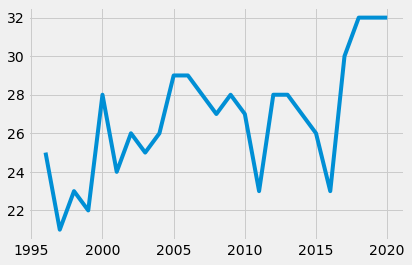

In [19]:
win_w = []
for year in range(25):
    w = all_df[year].at[0,'W']
    win_w.append(w)
plt.plot(yr, win_w)

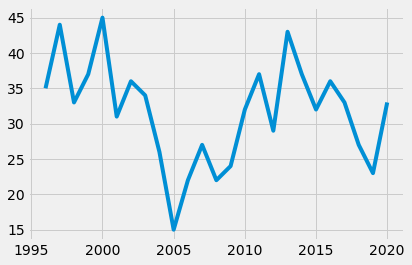

In [20]:
win_ga = []
for year in range(25):
    ga = all_df[year].at[0,'GA']
    win_ga.append(ga)
plt.plot(yr, win_ga)

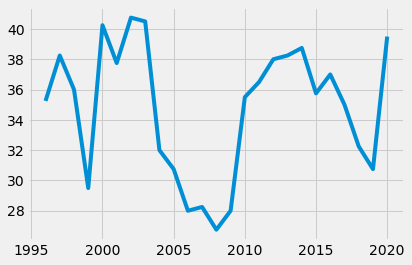

In [21]:
cham_ga = []
for year in range(25):
    ga = (all_df[year].at[0,'GA'] + all_df[year].at[1,'GA'] + all_df[year].at[2,'GA'] + all_df[year].at[3,'GA'])/4
    cham_ga.append(ga)
plt.plot(yr, cham_ga)

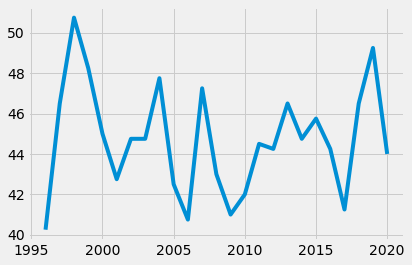

In [22]:
eur_ga = []
for year in range(25):
    ga = (all_df[year].at[4,'GA'] + all_df[year].at[5,'GA'] + all_df[year].at[6,'GA'] + all_df[year].at[7,'GA'])/4
    eur_ga.append(ga)
plt.plot(yr, eur_ga)

In [23]:
cham_ga

[35.25,
 38.25,
 36.0,
 29.5,
 40.25,
 37.75,
 40.75,
 40.5,
 32.0,
 30.75,
 28.0,
 28.25,
 26.75,
 28.0,
 35.5,
 36.5,
 38.0,
 38.25,
 38.75,
 35.75,
 37.0,
 35.0,
 32.25,
 30.75,
 39.5]

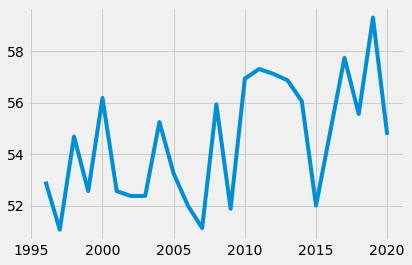

In [24]:
losers = list(range(4,20))
losers_ga = []
for year in range(25):
    ga = all_df[year][['GA']].iloc[losers].mean()
    losers_ga.append(ga)
plt.plot(yr, losers_ga)

In [25]:
all_df[24][['GA']].iloc[losers].mean()

GA    54.75
dtype: float64

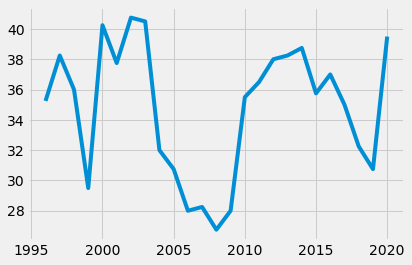

In [26]:
winners = list(range(4))
cham_ga = []
for year in range(25):
    ga = all_df[year][['GA']].iloc[winners].mean()
    cham_ga.append(ga)
plt.plot(yr, cham_ga)

In [27]:
cham_ga #mean of top 4 teams for every year

[GA    35.25
 dtype: float64,
 GA    38.25
 dtype: float64,
 GA    36.0
 dtype: float64,
 GA    29.5
 dtype: float64,
 GA    40.25
 dtype: float64,
 GA    37.75
 dtype: float64,
 GA    40.75
 dtype: float64,
 GA    40.5
 dtype: float64,
 GA    32.0
 dtype: float64,
 GA    30.75
 dtype: float64,
 GA    28.0
 dtype: float64,
 GA    28.25
 dtype: float64,
 GA    26.75
 dtype: float64,
 GA    28.0
 dtype: float64,
 GA    35.5
 dtype: float64,
 GA    36.5
 dtype: float64,
 GA    38.0
 dtype: float64,
 GA    38.25
 dtype: float64,
 GA    38.75
 dtype: float64,
 GA    35.75
 dtype: float64,
 GA    37.0
 dtype: float64,
 GA    35.0
 dtype: float64,
 GA    32.25
 dtype: float64,
 GA    30.75
 dtype: float64,
 GA    39.5
 dtype: float64]

In [28]:
losers_ga #mean of bottom 16 teams for every year

[GA    52.9375
 dtype: float64,
 GA    51.0625
 dtype: float64,
 GA    54.6875
 dtype: float64,
 GA    52.5625
 dtype: float64,
 GA    56.1875
 dtype: float64,
 GA    52.5625
 dtype: float64,
 GA    52.375
 dtype: float64,
 GA    52.375
 dtype: float64,
 GA    55.25
 dtype: float64,
 GA    53.25
 dtype: float64,
 GA    52.0
 dtype: float64,
 GA    51.125
 dtype: float64,
 GA    55.9375
 dtype: float64,
 GA    51.875
 dtype: float64,
 GA    56.9375
 dtype: float64,
 GA    57.3125
 dtype: float64,
 GA    57.125
 dtype: float64,
 GA    56.875
 dtype: float64,
 GA    56.0625
 dtype: float64,
 GA    52.0
 dtype: float64,
 GA    54.875
 dtype: float64,
 GA    57.75
 dtype: float64,
 GA    55.5625
 dtype: float64,
 GA    59.3125
 dtype: float64,
 GA    54.75
 dtype: float64]

In [29]:
cham_gf = []
for year in range(25):
    ga = all_df[year][['GF']].iloc[winners].mean()
    cham_gf.append(ga)

    
losers_gf = []
for year in range(25):
    ga = all_df[year][['GF']].iloc[losers].mean()
    losers_gf.append(ga)

In [30]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

test_statistic = welch_test_statistic(cham_ga, losers_ga)
print("Welch Test Statistic for Goals Against: {:2.2f}".format(test_statistic))

Welch Test Statistic for Goals Against: -20.20


In [31]:
test_statistic = welch_test_statistic(cham_gf, losers_gf)
print("Welch Test Statistic for Goals For: {:2.2f}".format(test_statistic))

Welch Test Statistic for Goals For: 20.35


In [32]:
ttest_ind(cham_gf, losers_gf, equal_var=False)

Ttest_indResult(statistic=array([19.93968863]), pvalue=array([2.17408211e-18]))

In [33]:
ttest_ind(cham_ga, losers_ga, equal_var=False)

Ttest_indResult(statistic=array([-19.79336972]), pvalue=array([3.63858971e-21]))

Text(0.5, 1.0, 'Distribution of Average Goals Against')

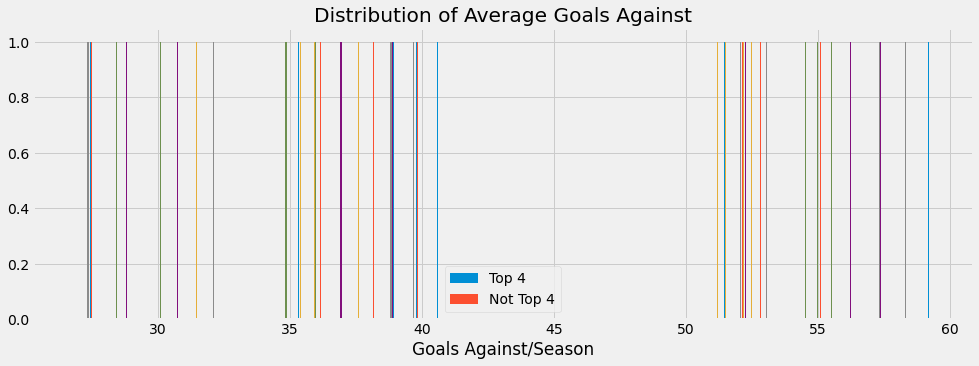

In [67]:
fig, ax = plt.subplots(1, figsize=(15, 5))

ax.hist(cham_ga, label="Top 4")
ax.hist(losers_ga, label="Not Top 4")
ax.set_xlabel('Goals Against/Season')
ax.legend()
ax.set_title("Distribution of Average Goals Against")

Text(0.5, 1.0, 'Distribution of Average Goals For')

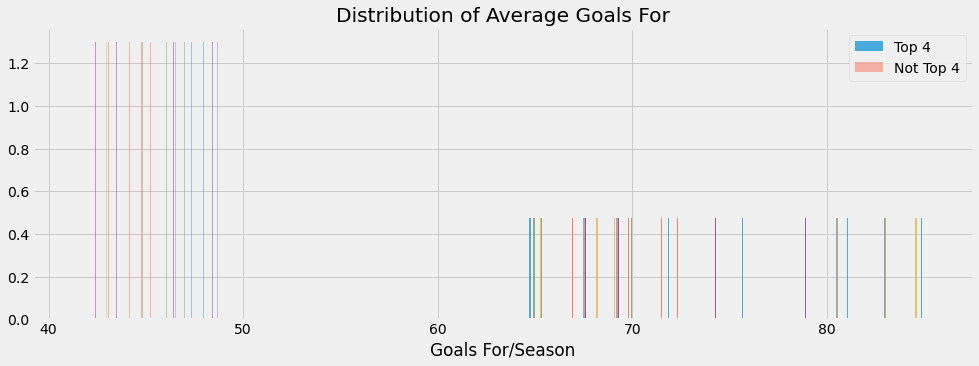

In [46]:
fig, ax = plt.subplots(1, figsize=(15, 5))

ax.hist(cham_gf, alpha=.7, density=True, bins=10, label="Top 4")
ax.hist(losers_gf, alpha=.4, density=True, bins=10, label="Not Top 4")
ax.set_xlabel('Goals For/Season')
ax.legend()
ax.set_title("Distribution of Average Goals For")

In [48]:
yr

[1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

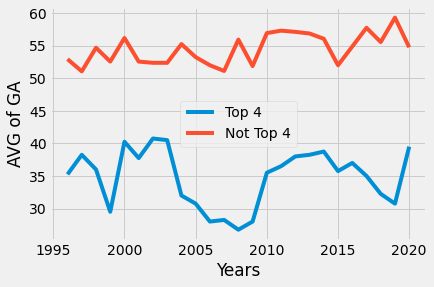

In [51]:
plt.plot(yr, cham_ga, label = "Top 4")
plt.plot(yr, losers_ga, label = "Not Top 4")
plt.xlabel('Years')
plt.ylabel('AVG of GA')
#plt.title('')
plt.legend()
plt.show()

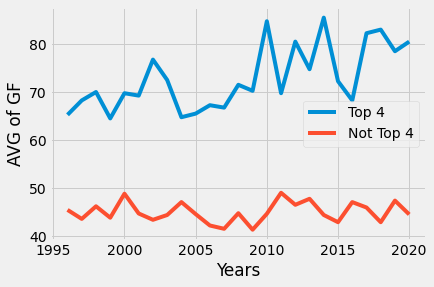

In [52]:
plt.plot(yr, cham_gf, label = "Top 4")
plt.plot(yr, losers_gf, label = "Not Top 4")
plt.xlabel('Years')
plt.ylabel('AVG of GF')
#plt.title('')
plt.legend()
plt.show()

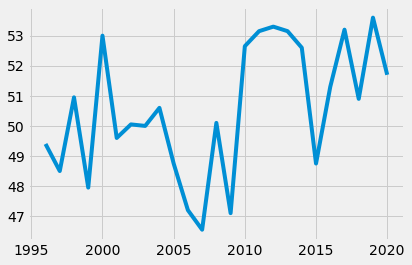

In [74]:
total_gf = []
for year in range(25):
    gf = all_df[year][['GF']].mean()
    total_gf.append(gf)
plt.plot(yr, total_gf)

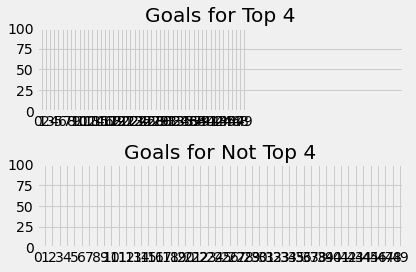

In [80]:
fig, axs = plt.subplots(2)

axs[0].hist(cham_gf, bins=20)
axs[0].set_title("Goals for Top 4")
axs[0].set_xticks(np.arange(0,50))
axs[0].set_yticks([0, 25, 50, 75, 100])

axs[1].hist(losers_gf, bins=20)
axs[1].set_title("Goals for Not Top 4")
axs[1].set_xticks(np.arange(0,50))
axs[1].set_yticks([0, 25, 50, 75, 100])

fig.tight_layout()

In [81]:
df

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,xG,xGA,xGDiff,xGDiff/90
0,1,Liverpool,38,32,3,3,85,33,52,99,71.5,40.0,31.5,0.83
1,2,Manchester City,38,26,3,9,102,35,67,81,93.0,34.7,58.3,1.53
2,3,Manchester Utd,38,18,12,8,66,36,30,66,59.4,37.4,22.0,0.58
3,4,Chelsea,38,20,6,12,69,54,15,66,66.6,37.9,28.6,0.75
4,5,Leicester City,38,18,8,12,67,41,26,62,61.6,44.5,17.1,0.45
5,6,Tottenham,38,16,11,11,61,47,14,59,46.1,52.0,-6.0,-0.16
6,7,Wolves,38,15,14,9,51,40,11,59,47.1,34.8,12.3,0.32
7,8,Arsenal,38,14,14,10,56,48,8,56,49.2,56.6,-7.3,-0.19
8,9,Sheffield Utd,38,14,12,12,39,39,0,54,41.5,47.9,-6.4,-0.17
9,10,Burnley,38,15,9,14,43,50,-7,54,43.9,48.3,-4.4,-0.12


In [82]:
df['GA/GAME'] = df['GA']/df['MP']

In [83]:
df

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,xG,xGA,xGDiff,xGDiff/90,GA/GAME
0,1,Liverpool,38,32,3,3,85,33,52,99,71.5,40.0,31.5,0.83,0.868421
1,2,Manchester City,38,26,3,9,102,35,67,81,93.0,34.7,58.3,1.53,0.921053
2,3,Manchester Utd,38,18,12,8,66,36,30,66,59.4,37.4,22.0,0.58,0.947368
3,4,Chelsea,38,20,6,12,69,54,15,66,66.6,37.9,28.6,0.75,1.421053
4,5,Leicester City,38,18,8,12,67,41,26,62,61.6,44.5,17.1,0.45,1.078947
5,6,Tottenham,38,16,11,11,61,47,14,59,46.1,52.0,-6.0,-0.16,1.236842
6,7,Wolves,38,15,14,9,51,40,11,59,47.1,34.8,12.3,0.32,1.052632
7,8,Arsenal,38,14,14,10,56,48,8,56,49.2,56.6,-7.3,-0.19,1.263158
8,9,Sheffield Utd,38,14,12,12,39,39,0,54,41.5,47.9,-6.4,-0.17,1.026316
9,10,Burnley,38,15,9,14,43,50,-7,54,43.9,48.3,-4.4,-0.12,1.315789


In [89]:
df

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,xG,xGA,xGDiff,xGDiff/90,GA/GAME,GF/GAME
0,1,Liverpool,38,32,3,3,85,33,52,99,71.5,40.0,31.5,0.83,0.868421,2.236842
1,2,Manchester City,38,26,3,9,102,35,67,81,93.0,34.7,58.3,1.53,0.921053,2.684211
2,3,Manchester Utd,38,18,12,8,66,36,30,66,59.4,37.4,22.0,0.58,0.947368,1.736842
3,4,Chelsea,38,20,6,12,69,54,15,66,66.6,37.9,28.6,0.75,1.421053,1.815789
4,5,Leicester City,38,18,8,12,67,41,26,62,61.6,44.5,17.1,0.45,1.078947,1.763158
5,6,Tottenham,38,16,11,11,61,47,14,59,46.1,52.0,-6.0,-0.16,1.236842,1.605263
6,7,Wolves,38,15,14,9,51,40,11,59,47.1,34.8,12.3,0.32,1.052632,1.342105
7,8,Arsenal,38,14,14,10,56,48,8,56,49.2,56.6,-7.3,-0.19,1.263158,1.473684
8,9,Sheffield Utd,38,14,12,12,39,39,0,54,41.5,47.9,-6.4,-0.17,1.026316,1.026316
9,10,Burnley,38,15,9,14,43,50,-7,54,43.9,48.3,-4.4,-0.12,1.315789,1.131579


In [125]:
cham_ga = []
for year in range(25):
    for position in winners:
        cham_ga.append(all_df[year].at[position,'GA/GAME'])
losers_ga = []
for year in range(25):
    for position in losers:
        losers_ga.append(all_df[year].at[position,'GA/GAME'])

In [116]:
cham_gf

[0.9210526315789473,
 0.9736842105263158,
 0.8947368421052632,
 0.9210526315789473,
 1.1578947368421053,
 1.0526315789473684,
 0.8421052631578947,
 0.9736842105263158,
 0.868421052631579,
 0.6842105263157895,
 1.105263157894737,
 1.131578947368421,
 0.9736842105263158,
 0.4473684210526316,
 0.7894736842105263,
 0.8947368421052632,
 1.1842105263157894,
 1.131578947368421,
 1.131578947368421,
 0.7894736842105263,
 0.8157894736842105,
 1.0,
 1.0263157894736843,
 1.131578947368421,
 0.9473684210526315,
 0.7894736842105263,
 1.1842105263157894,
 1.368421052631579,
 0.8947368421052632,
 1.105263157894737,
 1.263157894736842,
 1.0,
 0.6842105263157895,
 0.7894736842105263,
 0.9210526315789473,
 0.9736842105263158,
 0.39473684210526316,
 0.9473684210526315,
 0.6842105263157895,
 1.2105263157894737,
 0.5789473684210527,
 0.8947368421052632,
 0.6578947368421053,
 0.8157894736842105,
 0.7105263157894737,
 0.631578947368421,
 0.7105263157894737,
 0.9210526315789473,
 0.5789473684210527,
 0.6842105

Text(0.5, 1.0, 'Distribution of Goals Against per game')

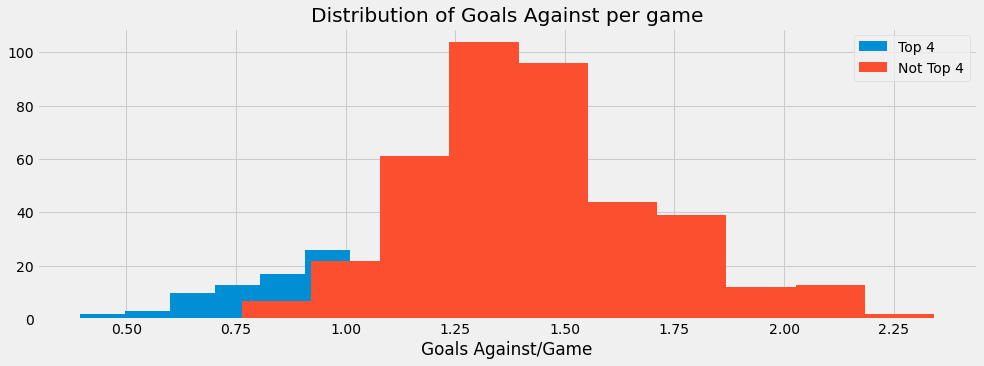

In [126]:
fig, ax = plt.subplots(1, figsize=(15, 5))

ax.hist(cham_gf, label="Top 4")
ax.hist(losers_gf, label="Not Top 4")
ax.set_xlabel('Goals Against/Game')
ax.legend()
ax.set_title("Distribution of Goals Against per game")

In [122]:
len(losers_gf)

400

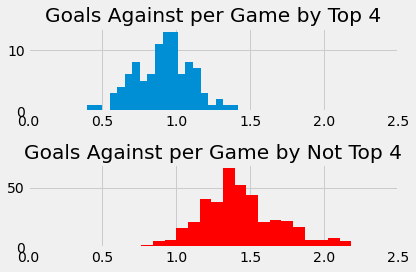

In [155]:
fig, axs = plt.subplots(2)

axs[0].hist(cham_ga, bins=20)
axs[0].set_title("Goals Against per Game by Top 4")
axs[0].set_xticks(np.arange(0,3,.5))

axs[1].hist(losers_ga, color='red', bins=20)
axs[1].set_title("Goals Against per Game by Not Top 4")
axs[1].set_xticks(np.arange(0,3,.5))

fig.tight_layout()

In [132]:
test_statistic = welch_test_statistic(cham_ga, losers_ga)
print("Welch Test Statistic for Goals Against: {:2.2f}".format(test_statistic))

Welch Test Statistic for Goals Against: -21.89


In [135]:
ttest_ind(cham_ga, losers_ga, equal_var=False)

Ttest_indResult(statistic=-21.81120531440128, pvalue=2.522098299208431e-55)

In [128]:
cham_gf = []
for year in range(25):
    for position in winners:
        cham_gf.append(all_df[year].at[position,'GF/GAME'])
losers_gf = []
for year in range(25):
    for position in losers:
        losers_gf.append(all_df[year].at[position,'GF/GAME'])

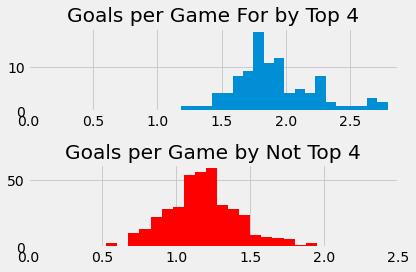

In [154]:
fig, axs = plt.subplots(2)

axs[0].hist(cham_gf, bins=20)
axs[0].set_title("Goals per Game For by Top 4")
axs[0].set_xticks(np.arange(0,3,.5))

axs[1].hist(losers_gf, color='red', bins=20)
axs[1].set_title("Goals per Game by Not Top 4")
axs[1].set_xticks(np.arange(0,3,.5))

fig.tight_layout()

In [133]:
test_statistic = welch_test_statistic(cham_gf, losers_gf)
print("Welch Test Statistic for Goals For: {:2.2f}".format(test_statistic))

Welch Test Statistic for Goals For: 21.87


In [134]:
ttest_ind(cham_gf, losers_gf, equal_var=False)

Ttest_indResult(statistic=21.776471878803708, pvalue=1.8017200989646294e-45)